In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


##**Data Preparation**

In [3]:
# Creating one-hot representation of target
y_train_encoded = []
y_test_encoded = []

for label in y_train:
    encoded = np.zeros(10)
    encoded[label]=1
    y_train_encoded.append(encoded)
for label in y_test:
    encoded = np.zeros(10)
    encoded[label]=1
    y_test_encoded.append(encoded)

    
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

print(y_train[1])
print(y_train_encoded[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
# Scaling the values
x_train = x_train/255
x_test = x_test/255

print(x_train[:3])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


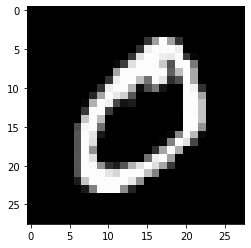

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1],cmap="gray")
plt.show()

In [6]:
type(y_train_encoded)

numpy.ndarray

In [7]:
"""
Conv2D however expects 4 dimensions,because it also expects the channels dimension of image,
which in MNIST is nonexistent because it’s grayscale data and hence is 1.

Reshaping the data, while explicitly adding the channels dimension, resolves the issue.
The input shape a CNN accepts should be in a specific format.
In Tensorflow,the format is (num_samples, height, width, channels)
"""
# x_train.shape = (60000, 28, 28)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

## **Model Training**

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization,Activation
from keras.callbacks import Callback

# Defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

# loss="categorical_crossentropy" gives an unidentified error.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)       

In [14]:
# Custom Keras callback to stop training when certain accuracy is achieved.
class MyThresholdCallback(Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True


model.fit(x_train, y_train, epochs=5, callbacks=[MyThresholdCallback(1)],validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0346 - val_accuracy: 0.9885
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0321 - val_accuracy: 0.9901
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0178 - val_accuracy: 0.9937
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0165 - val_accuracy: 0.9947
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0269 - val_accuracy: 0.9917


In [15]:
# Saving the model
model.save("CNN_on_MNIST")

INFO:tensorflow:Assets written to: CNN_on_MNIST/assets


In [23]:
from keras.models import load_model

# loading saved model
model = load_model("CNN_on_MNIST")
predicted = model.predict(x_test)

print(predicted)

# Checking Individual sample
print("ACTUAL VALUE : ",y_test[2])
print("PREDICTED VALUE : ",np.argmax(predicted[2]))

[[3.1298050e-08 2.3216164e-06 2.8821364e-07 ... 9.9999309e-01
  9.8614690e-09 3.2712703e-06]
 [1.1494640e-08 1.3175214e-06 9.9999857e-01 ... 5.5663413e-08
  1.8841387e-08 1.4342296e-09]
 [1.7100593e-09 9.9999166e-01 8.0418154e-08 ... 8.0041482e-06
  2.1956339e-09 2.4256310e-09]
 ...
 [7.3667064e-16 5.2630361e-10 8.0806042e-14 ... 4.6080117e-10
  2.9413749e-10 2.2223792e-11]
 [1.5717619e-09 1.3788767e-13 1.5764327e-14 ... 5.2275122e-13
  1.9629299e-08 5.9681765e-12]
 [2.5247698e-07 1.7176415e-11 3.2611965e-07 ... 4.7227505e-13
  9.1711399e-08 4.9560123e-13]]
ACTUAL VALUE :  1
PREDICTED VALUE :  1
